# Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. Its methods can be applied to almost all types of data. For example: 


*   Face recognition
*   Text categorization
*   Classification of images
*   Bioinformatics



Because it is a supervised learning model it means that the sample data must be labeled.

The most common applications of SVM are classification problems, so let's start with them.

## Advantages and Disadvantages

Before we start to illustrate problems that can be solved with SVM, we need to keep in mind that not every problem or data set performs well when applied to SVM

**Advantages**

*   Effective in high dimensional spaces
*   Still effective in cases where number of dimensions is greater than the number of samples.
*   memory efficient because it uses a subset of training points in the decision function (the support vectors)
* Versatile: different Kernel functions can be specified for the decision function and supports custom kernels.

**Disadvantages**

*   SVM algorithm is not suitable for large data sets (compute and storage increse rapdily; the core of an SVM is a quadratic programming problem)
*   SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
*   Choosing a “good” kernel function is not easy.



## Classsification Problems

The simplest examples of classification problems are the classification between 2 classes (is this or that?). For example:

*   Having the photo of a Canid, tell me if it is a dog or a wolf.
*   Having the photo of alligators and crocodiles, differentiate them
*   Having data on the height and weight of several people, tell me who is a man and who is a woman


So, lets suppose that we have 2 or more labeled classes of data, Support Vector Machine acts as a discriminative classifier, formally defined by an optimal hyperplane that seperates all the classes.

Optimal hyperplane? What is that?

To undestand SVM we need to dive into some core concepts, so let's take an image to ilustrate them.

<center><img src="https://i.imgur.com/QGYQtPW.png"/></center>

The image above shows an example of 2 groups (blue and red) based in 2 features (x axis and y axis). So, if we choose any new data point at this plane, our model needs to know how to classify this new data point. We can see that a line is drawn between the 2 groups. This division allows us to choose a new data and place it in the appropriate group based on which side of the line they fall on, and therefore, we can predict the unknowns.

To divide these groups, this line could be drawn in any other way that separated them, however, to predict the results it is always necessary to separate the groups in the best possible way. "The best possible way" means that this line must have a maximum space that separates the 2 classes, in this example. This maximum space defined between groups is called the margin. The greater the margin, the better the division between groups.

Technically, we say that the support vectors and the hyperplane should be as far away as possible. That is, the support vectors represent the extreme points of each group in the dataset and hyperplane means the line that separates them.

The image below allows us to see that when the hyperplane is not optimal we get smaller margins and this worsens the classification of new data points.

<center><img src="https://i.imgur.com/KVMWeyN.png"/></center>

We call the hyperplane division line because when we are dealing with multiple dimensions this division is not just a line but a plane of intersections. A hyperplane in R² is a line, a hyperplane in R³ is a plane, a hyperplane in R<sup>n</sup> is an n-1 dimensional subspace.

<center><img src="https://i.imgur.com/CnTG4C7.png"/></center>

Therefore, we arrive at the definition of the following terms:

**Margin:** is a separation of line to the closest class points.

**Optimal hyper-plane:** The plane which maximizes the margin of the training data.

**Support vectors:** represent the extreme points of each group in the dataset.


So far, we have discussed particular cases of SVM models. When we can easily separate data with hyperplane by drawing a straight line is Linear SVM. When we cannot separate data with a straight line we use Non – Linear SVM. In this, we have Kernel functions.

The kernel function take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types. For example: **linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid**. These functions allow us to transform our data into high dimensional features spaces.

<center><img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png"/></center>



### Linear Classification

Let's start with our simplest case, where we have a set of data that can be separated into 2 groups from 2 features.

below we are using the `make_blobs` function to create this data set, then we create a linear classifier to create our model.

With that defined, we can plot our data, the hyperplane, the support vectors and the margin lines.

Just to illustrate, let's assume that this set of data created represents dogs (blue) and cats (red) and that we are trying to classify them based on 2 features: snout lenght and ear geometry. We assume that dogs generally have longer snouts and cats have much more pointy ear shapes.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
from sklearn import svm
from sklearn.datasets.samples_generator import make_blobs, make_circles

# create 100 separable points
X, y = make_blobs(n_samples=100, centers=2, center_box=(0, 20), random_state=50)
# fitting the model
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

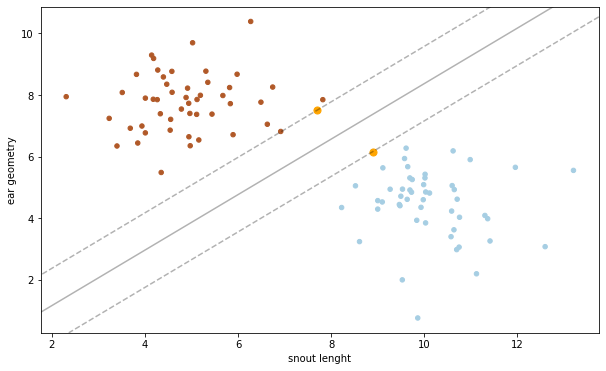

In [37]:
# displaying data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.Paired)

# plotting the decision function
dec_fun = plt.gca()
xlim = dec_fun.get_xlim()
ylim = dec_fun.get_ylim()

# creating the grid to evalueate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plotting decision boundary and margins
dec_fun.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.3, linestyles=['--', '-', '--'])
# plotting support vectors
dec_fun.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=50, linewidth=1, facecolors='orange')

plt.xlabel('snout lenght')
plt.ylabel('ear geometry')
plt.show()

Given a new data point, we can predict if it is a cat or a dog. The result will be an array containing the number of the predicted class

In [38]:
ear_geometry = 3
snout_lenght = 10
clf.predict([[ear_geometry, snout_lenght]]) # it's a dog

array([1])

### Non-Linear Classification

To illustrate non-linear classification we will use the [example](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py) from scikit learn official website, which creates a model to perform binary classification using non-linear SVC with Radial Basis Function (RBF) kernel and try to predict a XOR operation of the inputs.

In [39]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)

# creating random data inputs
X = np.random.randn(300, 2)
# fill label with logical xor of the inputs
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

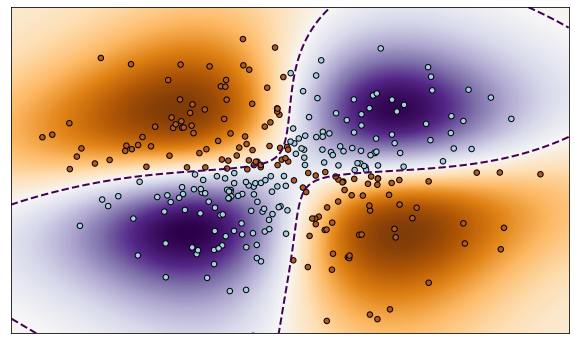

In [40]:
# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Given a new data point, we can predict the logical operation XOR using the inputs.


In [41]:
first_input = 1
second_input = -1
clf.predict([[first_input, second_input]])

array([ True])

## Regression Problems

The method of Support Vector Classification can be extended to solve regression problems. This method is called Support Vector Regression (SVR). The logic is similar but, unlike classification, here we can have infinite values. We can also use linear and non-linear kernels. 

In [ ]:
df = pd.DataFrame ({'position': ['Business Analyst', 'Junior Consultant', 'Senior Consultant', 'Manager', 
                     'Country Manager', 'Region Manager', 'Partner', 'Senior Partner', 'C-level', 'CEO'],
        'level': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'salary': [45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000, 1000000]})

df

,position,level,salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


Then we are going to isolate our levels (X), the independent variable, and the salary (Y), the dependent variable. 

In [ ]:
X = df.iloc[: ,1:2].values
y = df.iloc[:, 2:].values

We are going to feature scale our data and fit it into the model.

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

regressor = svm.SVR(kernel = "rbf")
regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

We then plot the salary/levels scatter plot and the blue line represents what the model predicted for in each level. 

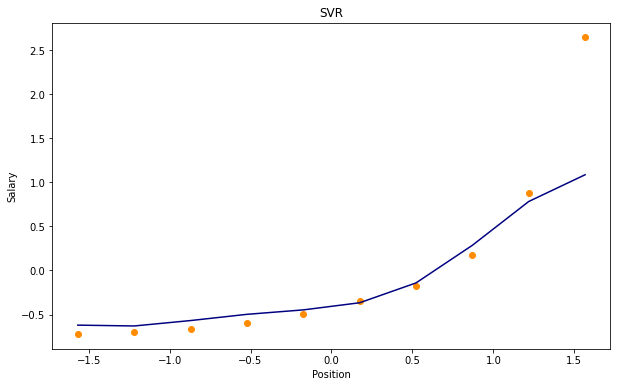

In [ ]:
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, regressor.predict(X), color='navy')
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

To predict another level (for example 3.5) we need to scale that, since our model is scaled. And we then need to inverse the scaling of the prediction so we can understand the real value of the salary.

In [ ]:
sc_X_val = sc_X.transform(np.array([[3.5]]))
scaled_y_pred = regressor.predict(sc_X_val)
y_pred = sc_y.inverse_transform(scaled_y_pred) 
y_pred

array([98851.5386261])

So, a person in a new level 3.5 would earn $98851,53.